In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/knives"))

# Any results you write to the current directory are saved as output.

['training_set', 'test_set']


Text(0.5, 1.0, 'This is my Knife Picture')

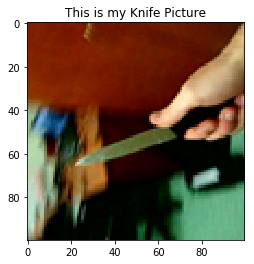

In [80]:
test_image = image.load_img('../input/knives/test_set/Knives/10579.bmp')
plt.imshow(test_image)
plt.title('This is my Knife Picture')

Text(0.5, 1.0, 'This is my Negative Picture')

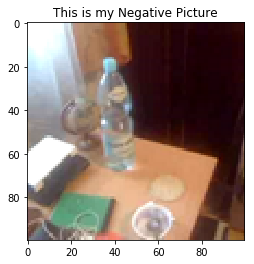

In [78]:
test_image = image.load_img('../input/knives/test_set/No_Knives/13616.bmp')
plt.imshow(test_image)
plt.title('This is my Negative Picture')

In [75]:
from keras_preprocessing.image import ImageDataGenerator

In [24]:
testset = ImageDataGenerator(rescale = 1./255)
trainset = ImageDataGenerator(rescale = 1./255)

In [25]:
t1=testset.flow_from_directory(directory='../input/knives/test_set',class_mode='binary',target_size=(64,64))
t2=trainset.flow_from_directory(directory='../input/knives/training_set',class_mode='binary',target_size=(64,64))

Found 1600 images belonging to 2 classes.
Found 5476 images belonging to 2 classes.


In [28]:
model = Sequential()
model.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3),input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               7872640   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 7,874,561
Trainable params: 7,874,561
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
cnn = model.fit_generator(t2,epochs=10,steps_per_epoch=350)

Epoch 1/10
350/350 [==============================] - 9s 27ms/step - loss: 0.2737 - acc: 0.8943
Epoch 2/10
350/350 [==============================] - 9s 25ms/step - loss: 0.1044 - acc: 0.9609
Epoch 3/10
350/350 [==============================] - 9s 27ms/step - loss: 0.0455 - acc: 0.9862
Epoch 4/10
350/350 [==============================] - 9s 27ms/step - loss: 0.0196 - acc: 0.9953
Epoch 5/10
350/350 [==============================] - 9s 26ms/step - loss: 0.0120 - acc: 0.9975
Epoch 6/10
350/350 [==============================] - 9s 25ms/step - loss: 0.0045 - acc: 0.9996
Epoch 7/10
350/350 [==============================] - 9s 25ms/step - loss: 0.0223 - acc: 0.9922
Epoch 8/10
350/350 [==============================] - 9s 25ms/step - loss: 0.0146 - acc: 0.9953
Epoch 9/10
350/350 [==============================] - 9s 25ms/step - loss: 0.0096 - acc: 0.9977
Epoch 10/10
350/350 [==============================] - 9s 25ms/step - loss: 6.3311e-04 - acc: 1.0000


In [32]:
test_accu = model.evaluate_generator(t1,steps=500)

In [33]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 81.56875 %


In [46]:
os.listdir('../input/knives/test_set')

['Knives', 'No_Knives']

Text(0.5, 1.0, 'This is my Testing Picture')

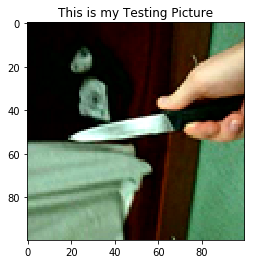

In [87]:
img = image.load_img('../input/knives/test_set/Knives/10570.bmp')
plt.imshow(img)
plt.title('This is my Testing Picture')

In [82]:
from keras.preprocessing import image
test_image = image.load_img('../input/knives/test_set/Knives/10570.bmp')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

In [83]:
val = model.predict_classes(test_image)

In [84]:
if val[0][0]==1:
    print("Not a Knive")
else:
    print("Knive")

Knive
